In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(-2.5,2.5,0.2)
y = np.copy(x)
alpha = 1.0*np.pi/8
velo = 2.0
R = 1.0
gamma = -10.0

In [3]:
X,Y = np.meshgrid(x,y)
Z = X+Y*1.j
mask_circ = np.abs(Z)<R**2
Z[mask_circ] = np.nan
W_cyl = velo*(np.exp(1j*alpha) -R**2/(Z**2*np.exp(1j*alpha) ) ) - 1j*(gamma/(2*np.pi*Z))
U = np.real(W_cyl)
V = -np.imag(W_cyl)

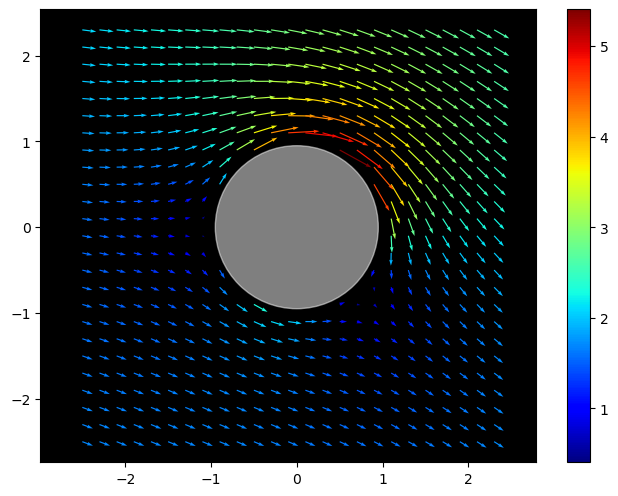

In [4]:
fig=plt.figure(figsize=(8,6), dpi=100, facecolor='w', edgecolor='k')
plt.jet()
ax = fig.add_subplot(111)
C = np.hypot(U, V)
circle = plt.Circle((0,0),R*0.95,color='w',alpha=0.5)
ax.add_artist(circle)
cs = ax.quiver(X[:],Y[:],U[:],V[:],C,scale=400/np.nanmax(C))
ax.axis('equal')
ax.set_facecolor('k')
fig.colorbar(cs, ax=ax)
plt.show()
plt.close()

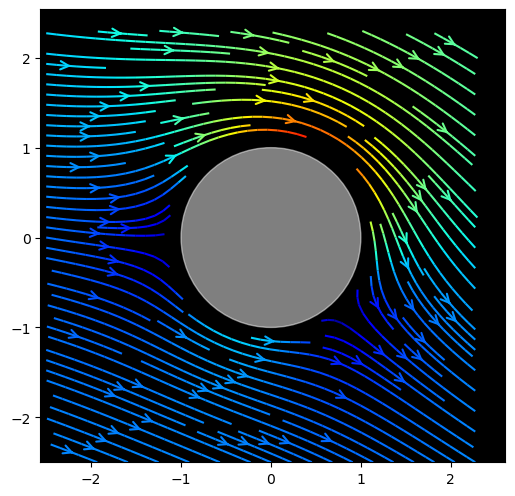

In [5]:
fig=plt.figure(figsize=(6,6), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
C = np.hypot(U, V)
circle = plt.Circle((0,0),R,color='w',alpha=0.5)
ax.add_artist(circle)
ax.streamplot(X[:],Y[:],U[:],V[:],color=C,density=1.5,arrowstyle='->', arrowsize=1.5)
ax.axis('equal')
ax.set_facecolor('k')
plt.jet()
plt.show()
plt.close()

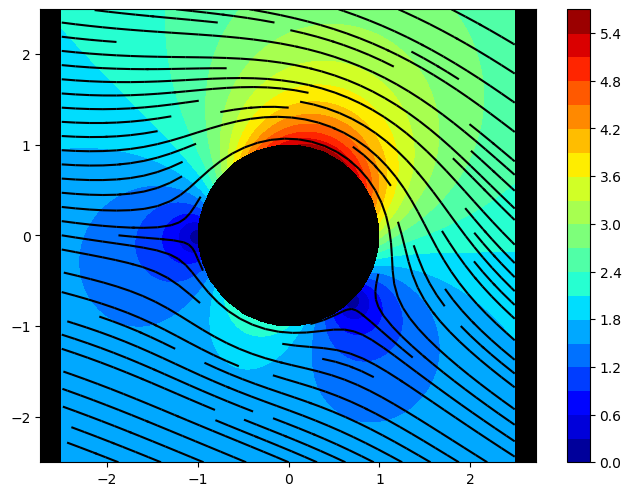

In [6]:
x_fine = np.arange(-2.5,2.5,0.01)
y_fine = np.copy(x_fine)
X_fine,Y_fine = np.meshgrid(x_fine,y_fine)
Z_fine = X_fine+Y_fine*1.j
mask_circ_fine = np.abs(Z_fine)<R**2
Z_fine[mask_circ_fine] = np.nan
W_cyl_fine = velo*(np.exp(1j*alpha) -R**2/(Z_fine**2*np.exp(1j*alpha)) ) - 1j*(gamma/(2*np.pi*Z_fine))
U_fine = np.real(W_cyl_fine)
V_fine = -np.imag(W_cyl_fine)
C_fine = np.hypot(U_fine, V_fine)

fig=plt.figure(figsize=(8,6), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
cs = ax.contourf(X_fine,Y_fine,C_fine,levels=20)
ax.streamplot(X_fine[:],Y_fine[:],U_fine[:],V_fine[:],color='black',density=1.1,arrowstyle='-')

ax.axis('equal')
ax.set_facecolor('k')
plt.jet()
fig.colorbar(cs, ax=ax)
plt.show()
plt.close()

In [7]:
Z = np.flipud(Z)
fz = Z +R**2/Z
fx = np.real(fz)
fy = np.imag(fz)
transform = 1./(1.-R**2/Z**2)
W_plate = W_cyl*transform
U_plate = np.real(W_plate)
V_plate = -np.imag(W_plate)
C_plate = np.hypot(U_plate, V_plate)

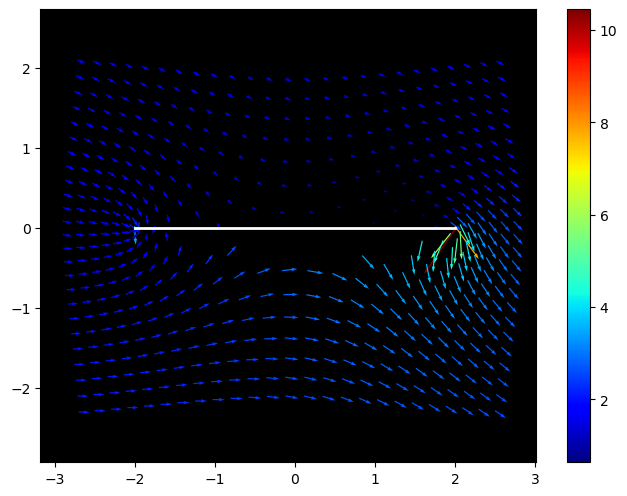

In [8]:
fig=plt.figure(figsize=(8,6), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.plot([-2,2],[0,0],'-w',lw=2)
cs = ax.quiver(fx[:],fy[:],U_plate[:],V_plate[:],C_plate,scale=1000/np.nanmax(C_plate))
ax.axis('equal')
ax.set_facecolor('k')
plt.jet()
fig.colorbar(cs, ax=ax)
plt.show()
plt.close()